In [1]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
lena_arr = np.asarray(image)

In [2]:
def expand(lena_arr):
    expanded_image = np.zeros((lena_arr.shape[0] + 2, lena_arr.shape[1] + 2), dtype=lena_arr.dtype)
    
    expanded_image[1:-1, 1:-1] = lena_arr
    expanded_image[0, 0] = lena_arr[0, 0]
    expanded_image[0, -1] = lena_arr[0, -1]
    expanded_image[-1, 0] = lena_arr[-1, 0]
    expanded_image[-1, -1] = lena_arr[-1, -1]
    
    expanded_image[0, 1:-1] = expanded_image[1, 1:-1]  # top border row
    expanded_image[-1, 1:-1] = expanded_image[-2, 1:-1]  # bottom border row
    expanded_image[1:-1, 0] = expanded_image[1:-1, 1]  # left border column
    expanded_image[1:-1, -1] = expanded_image[1:-1, -2]  # right border column
    
    return expanded_image

In [3]:
lena_arr = expand(lena_arr)

In [4]:
def robert(lena_arr,theshold):
    robert = np.zeros_like(lena_arr, dtype=np.uint8)
    for i in range(1,lena_arr.shape[0]-1):
        for j in range(1,lena_arr.shape[1]-1):
            r1 = lena_arr[i+1][j+1] - lena_arr[i][j]
            r2 = lena_arr[i+1][j] - lena_arr[i][j+1]
            grad = (r1**2 + r2**2)**0.5
            if(grad <= theshold):
                robert[i][j]=255
    return robert

In [5]:
a=robert(np.array(lena_arr,dtype='int'),12)
cv2.imwrite('a.png', np.array(a, dtype='uint8'))

True

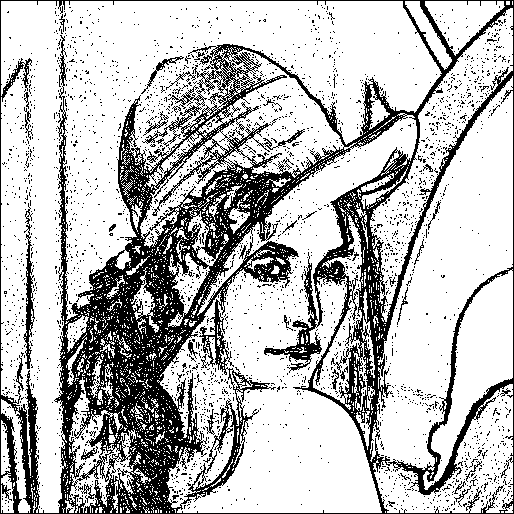

In [6]:
img.fromarray(np.array(a,dtype='uint8'))

In [7]:
def prewitt (lena_arr,theshold):
    prewitt = np.zeros_like(lena_arr, dtype=np.uint8)
    for i in range(lena_arr.shape[0]-2):
        for j in range(lena_arr.shape[1]-2):
            p1=lena_arr[i+2][j]+lena_arr[i+2][j+1]+lena_arr[i+2][j+2]-lena_arr[i][j]-lena_arr[i][j+1]-lena_arr[i][j+2]
            p2=lena_arr[i][j+2]+lena_arr[i+1][j+2]+lena_arr[i+2][j+2]-lena_arr[i][j]-lena_arr[i+1][j]-lena_arr[i+2][j]
            grad = (p1**2 + p2**2)**0.5
            if(grad <= theshold):
                prewitt[i][j]=255
    return prewitt

In [8]:
b=prewitt(np.array(lena_arr,dtype='int'),24)
cv2.imwrite('b.png', np.array(b, dtype='uint8'))

True

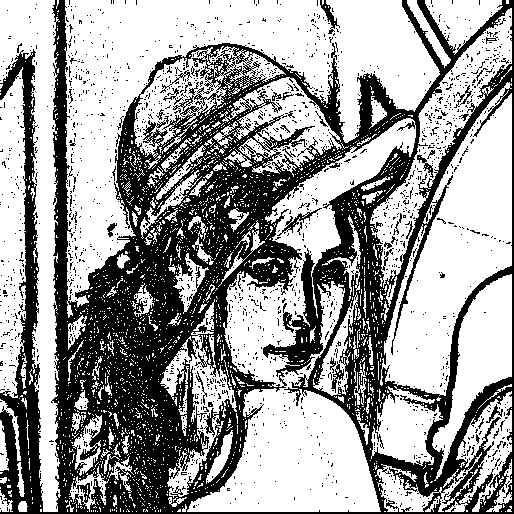

In [9]:
img.fromarray(np.array(b,dtype='uint8'))

In [10]:
def Sobel (lena_arr,theshold):
    Sobel = np.zeros_like(lena_arr, dtype=np.uint8)
    for i in range(lena_arr.shape[0]-2):
        for j in range(lena_arr.shape[1]-2):
            p1=lena_arr[i+2][j]+2*lena_arr[i+2][j+1]+lena_arr[i+2][j+2]-lena_arr[i][j]-2*lena_arr[i][j+1]-lena_arr[i][j+2]
            p2=lena_arr[i][j+2]+2*lena_arr[i+1][j+2]+lena_arr[i+2][j+2]-lena_arr[i][j]-2*lena_arr[i+1][j]-lena_arr[i+2][j]
            grad = (p1**2 + p2**2)**0.5
            if(grad <= theshold):
                Sobel[i][j]=255
    return Sobel

In [11]:
c=Sobel(np.array(lena_arr,dtype='int'),38)
cv2.imwrite('c.png', np.array(c, dtype='uint8'))

True

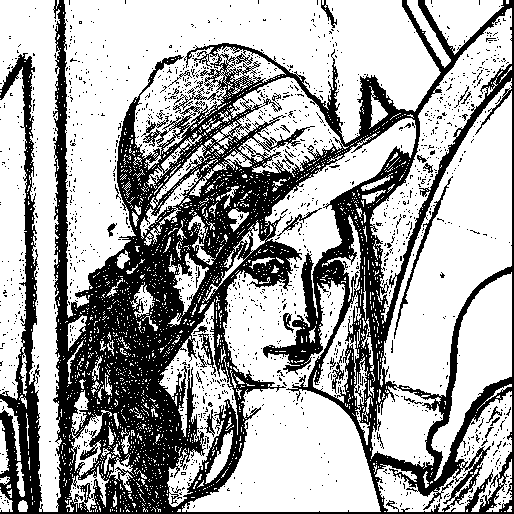

In [12]:
img.fromarray(np.array(c,dtype='uint8'))

In [13]:
def FreiandChen(lena_arr,theshold):
    FreiandChen = np.zeros_like(lena_arr, dtype=np.uint8)
    for i in range(lena_arr.shape[0]-2):
        for j in range(lena_arr.shape[1]-2):
            p1=lena_arr[i+2][j]+0.5*lena_arr[i+2][j+1]+lena_arr[i+2][j+2]-lena_arr[i][j]-0.5*lena_arr[i][j+1]-lena_arr[i][j+2]
            p2=lena_arr[i][j+2]+0.5*lena_arr[i+1][j+2]+lena_arr[i+2][j+2]-lena_arr[i][j]-0.5*lena_arr[i+1][j]-lena_arr[i+2][j]
            grad = (p1**2 + p2**2)**0.5
            if(grad <= theshold):
                FreiandChen[i][j]=255
    return FreiandChen

In [14]:
d=Sobel(np.array(lena_arr,dtype='int'),38)
cv2.imwrite('d.png', np.array(d, dtype='uint8'))

True

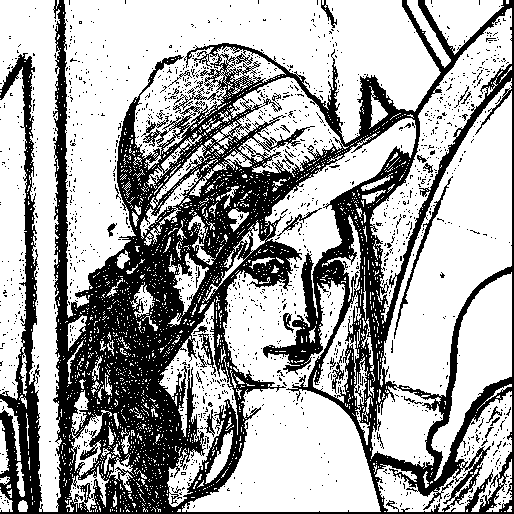

In [15]:
img.fromarray(np.array(d,dtype='uint8'))

In [16]:
def Krisch(lena_arr,theshold):
    Krisch = np.zeros_like(lena_arr, dtype=np.uint8)
    for i in range(lena_arr.shape[0]-2):
        for j in range(lena_arr.shape[1]-2):
            p1=5*(lena_arr[i][j+2]+lena_arr[i+1][j+2]+lena_arr[i+2][j+2]) + 3*(-lena_arr[i][j]-lena_arr[i][j+1]-lena_arr[i+1][j]-lena_arr[i+2][j]-lena_arr[i+2][j+1])
            
            p2=5*(lena_arr[i][j]+lena_arr[i+1][j]+lena_arr[i+2][j]) + 3*(-lena_arr[i][j+2]-lena_arr[i][j+1]-lena_arr[i+1][j+2]-lena_arr[i+2][j+2]-lena_arr[i+2][j+1])
            
            p3=5*(lena_arr[i][j]+lena_arr[i][j+1]+lena_arr[i][j+2]) + 3*(-lena_arr[i+1][j]-lena_arr[i+2][j]-lena_arr[i+1][j+2]-lena_arr[i+2][j+2]-lena_arr[i+2][j+1])
            
            p4=5*(lena_arr[i+2][j]+lena_arr[i+2][j+1]+lena_arr[i+2][j+2]) + 3*(-lena_arr[i][j]-lena_arr[i+1][j]-lena_arr[i][j+2]-lena_arr[i+1][j+2]-lena_arr[i][j+1])
            
            p5=5*(lena_arr[i][j]+lena_arr[i+1][j]+lena_arr[i][j+1]) + 3*(-lena_arr[i][j+2]-lena_arr[i+1][j+2]-lena_arr[i+2][j+2]-lena_arr[i+2][j+1]-lena_arr[i+2][j])
            
            p6=5*(lena_arr[i][j+2]+lena_arr[i+1][j+2]+lena_arr[i][j+1]) + 3*(-lena_arr[i][j]-lena_arr[i+1][j]-lena_arr[i+2][j]-lena_arr[i+2][j+1]-lena_arr[i+2][j+2])
            
            p7=5*(lena_arr[i+2][j+2]+lena_arr[i+1][j+2]+lena_arr[i+2][j+1]) + 3*(-lena_arr[i][j]-lena_arr[i][j+1]-lena_arr[i+1][j]-lena_arr[i+2][j]-lena_arr[i][j+2])
            
            p8=5*(lena_arr[i+2][j]+lena_arr[i+1][j]+lena_arr[i+2][j+1]) + 3*(-lena_arr[i][j]-lena_arr[i][j+1]-lena_arr[i][j+2]-lena_arr[i+1][j+2]-lena_arr[i+2][j+2])
            
            grad=max(p1,p2,p3,p4,p5,p6,p7,p8)
            
            if(grad <= theshold):
                Krisch[i][j]=255
                
    return Krisch

In [17]:
e=Krisch(np.array(lena_arr,dtype='int'),200)
cv2.imwrite('e.png', np.array(e, dtype='uint8'))

True

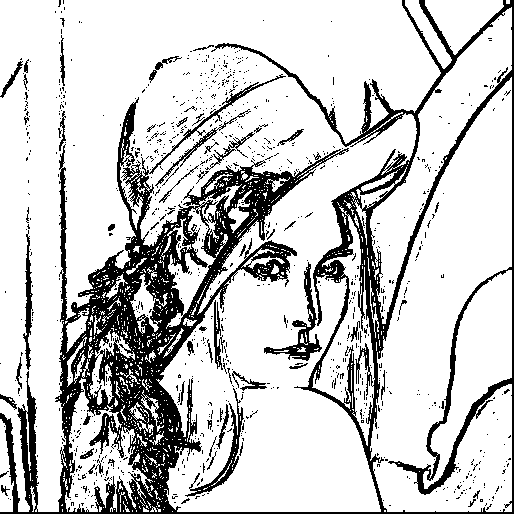

In [18]:
img.fromarray(np.array(e,dtype='uint8'))

In [19]:
def robinson(lena_arr, threshold):
    robinson = np.zeros_like(lena_arr, dtype=np.uint8)
    
    for i in range(lena_arr.shape[0]-2):
        for j in range(lena_arr.shape[1]-2):
            r0 = lena_arr[i][j+2]+2*lena_arr[i+1][j+2]+lena_arr[i+2][j+2]-lena_arr[i][j]-2*lena_arr[i+1][j]-lena_arr[i+2][j]
            r1 = lena_arr[i+2][j+1]+2*lena_arr[i+2][j+2]+lena_arr[i+1][j+2]-lena_arr[i][j+1]-2*lena_arr[i][j]-lena_arr[i+1][j]
            r2 = -(lena_arr[i+2][j]+2*lena_arr[i+2][j+1]+lena_arr[i+2][j+2]-lena_arr[i][j]-2*lena_arr[i][j+1]-lena_arr[i][j+2])
            r3 = lena_arr[i][j+1]+2*lena_arr[i][j+2]+lena_arr[i+1][j+2]-lena_arr[i+2][j+1]-2*lena_arr[i+2][j]-lena_arr[i+1][j]
            r4 = -(lena_arr[i][j+2]+2*lena_arr[i+1][j+2]+lena_arr[i+2][j+2]-lena_arr[i][j]-2*lena_arr[i+1][j]-lena_arr[i+2][j])
            r5 = -(lena_arr[i+2][j+1]+2*lena_arr[i+2][j+2]+lena_arr[i+1][j+2]-lena_arr[i][j+1]-2*lena_arr[i][j]-lena_arr[i+1][j])
            r6 = lena_arr[i+2][j]+2*lena_arr[i+2][j+1]+lena_arr[i+2][j+2]-lena_arr[i][j]-2*lena_arr[i][j+1]-lena_arr[i][j+2]
            r7 = -(lena_arr[i][j+1]+2*lena_arr[i][j+2]+lena_arr[i+1][j+2]-lena_arr[i+2][j+1]-2*lena_arr[i+2][j]-lena_arr[i+1][j])
            grad = max(r0, r1, r2, r3, r4, r5, r6, r7)
            
            if grad >= threshold:
                robinson[i][j] = 0
            else:
                robinson[i][j] = 255
    
    return robinson


In [20]:
f=robinson(np.array(lena_arr,dtype='int'),43)
cv2.imwrite('f.png', np.array(f, dtype='uint8'))

True

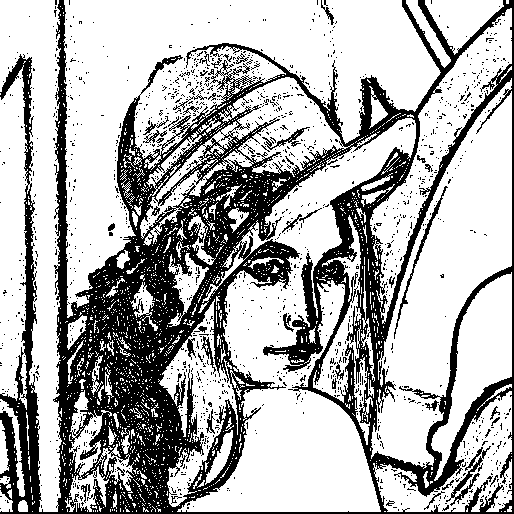

In [21]:
img.fromarray(np.array(f,dtype='uint8'))

In [22]:
lena_arr = expand(lena_arr)

In [23]:

def nevatia_babu_operator(lena_arr, threshold):
    height, width = lena_arr.shape
    nevatia_babu = np.zeros_like(lena_arr, dtype=np.uint8)
    
    # Define Nevatia-Babu 5x5 kernels
    kernels = [
        np.array([[100, 100, 100, 100, 100],
        [100, 100, 100, 100, 100],
        [0, 0, 0, 0, 0],
        [-100, -100, -100, -100, -100],
        [-100, -100, -100, -100, -100]]),
        np.array([[100, 100, 100, 100, 100],
        [100, 100, 100, 78, -32],
        [100, 92, 0, -92, -100],
        [32, -78, -100, -100, -100],
        [-100, -100, -100, -100, -100]]),
        np.array([[100, 100, 100, 32, -100],
        [100, 100, 92, -78, -100],
        [100, 100, 0, -100, -100],
        [100, 78, -92, -100, -100],
        [100, -32, -100, -100, -100]]),
        np.array([[-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, 0, 100, 100]]),
        np.array([ [-100, 32, 100, 100, 100],
        [-100, -78, 92, 100, 100],
        [-100, -100, 0, 100, 100],
        [-100, -100, -92, 78, 100],
        [-100, -100, -100, -32, 100]]),
        np.array([[100, 100, 100, 100, 100],
        [-32, 78, 100, 100, 100],
        [-100, -92, 0, 92, 100],
        [-100, -100, -100, -78, 32],
        [-100, -100, -100, -100, -100]])
    ]

    for i in range(2, height - 2):
        for j in range(2, width - 2):
            max_grad = 0
            for kernel in kernels:
                sub_region = lena_arr[i-2:i+3, j-2:j+3]
                grad = np.sum(sub_region * kernel)
                max_grad = max(max_grad, grad)
            if max_grad >= threshold:
                nevatia_babu[i][j] = 0
            else:
                nevatia_babu[i][j] = 255
                
    return nevatia_babu


In [24]:
g=nevatia_babu_operator(np.array(lena_arr,dtype='int'),12500)
cv2.imwrite('g.png', np.array(g, dtype='uint8'))

True

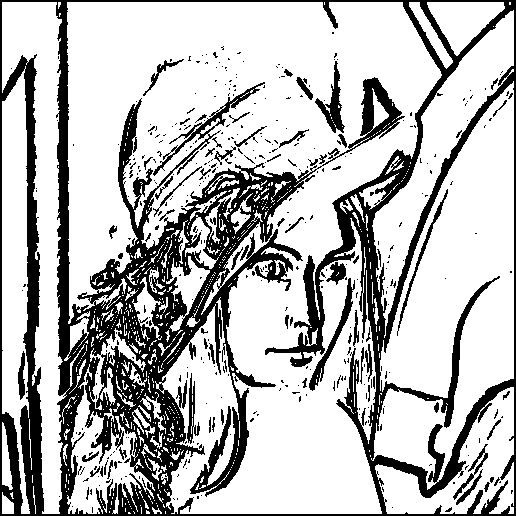

In [25]:
img.fromarray(np.array(g,dtype='uint8'))